In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean_1=np.array([0.0,0.0])
cov_1=np.array([[1.0,0.1],[0.1,1.1]])
mean_2=np.array([5.0,6.0])
cov_2=np.array([[1.3,0.2],[0.2,1.5]])
dist_01=np.random.multivariate_normal(mean_1,cov_1,500)
dist_02=np.random.multivariate_normal(mean_2,cov_2,500)

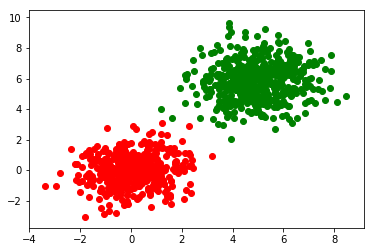

In [3]:
for i in dist_01:
    plt.scatter(i[0],i[1],color='red')
for i in dist_02:
    plt.scatter(i[0],i[1],color='green')

In [4]:

rows=dist_01.shape[0]+dist_02.shape[0]
cols=dist_01.shape[1] + 1
data=np.zeros((rows,cols))
data[0:5,:]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [5]:
data[:dist_01.shape[0],:-1]=dist_01
data[dist_01.shape[0]:,:-1]=dist_02
data[:dist_01.shape[0],-1]=0
data[dist_01.shape[0]:,-1]=1

In [6]:
np.random.shuffle(data)
data[:10,:]

array([[-1.61486229, -0.59886987,  0.        ],
       [ 7.28257943,  6.96026426,  1.        ],
       [-1.17291749, -1.30778866,  0.        ],
       [-0.71696221,  0.04025436,  0.        ],
       [ 6.46106123,  5.30830717,  1.        ],
       [ 4.6328528 ,  5.31331647,  1.        ],
       [ 5.9718404 ,  4.93555467,  1.        ],
       [-0.41088127,  1.00478044,  0.        ],
       [-1.32795121,  1.55281656,  0.        ],
       [ 2.41301035,  5.51024375,  1.        ]])

In [7]:
X=data[:,:-1]
Y=data[:,-1]

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.85,random_state=12)

In [9]:
acc=[]
for k in range(1,25):
    neigh=KNeighborsClassifier(n_neighbors=k,weights='uniform',algorithm='auto')
    neigh.fit(X_train,Y_train)
    y_pred=neigh.predict(X_test)
    print(accuracy_score(Y_test,y_pred)*100)
    acc.append(accuracy_score(Y_test,y_pred)*100)

99.8823529412
99.6470588235
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412
99.8823529412


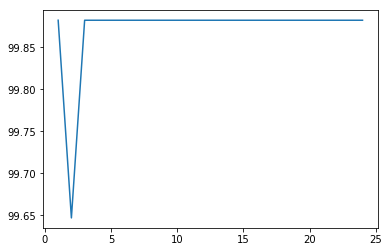

In [10]:
k=range(1,25)
plt.plot(k,acc)
plt.show()

In [11]:
raw_data=pd.read_csv('/home/pawan/Desktop/fashionmnist/fashion-mnist_train.csv')
raw_data.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [12]:
data=np.array(raw_data)
np.shape(data)

(60000, 785)

In [13]:
limit=4000
X=data[:limit,1:]
Y=data[:limit,0]
print(np.shape(X))
print(np.shape(Y))
np.unique(Y)

(4000, 784)
(4000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.85,random_state=15)

In [17]:
acc=[]
for k in range(1,25):
    neigh=KNeighborsClassifier(n_neighbors=k,weights='uniform',algorithm='auto')
    neigh.fit(x_train,y_train)
    y_pred=neigh.predict(x_test)
    print(accuracy_score(y_test,y_pred)*100)
    acc.append(accuracy_score(y_test,y_pred)*100)

73.4411764706
73.3235294118
72.8235294118
73.5882352941
73.3235294118
73.8529411765
73.3529411765
73.1176470588
72.8823529412
73.5
72.9411764706
72.6176470588
72.4117647059
72.3529411765
72.2058823529
71.6470588235
71.6176470588
71.5
71.1470588235
71.3235294118
70.8235294118
70.5588235294
70.5294117647
70.5


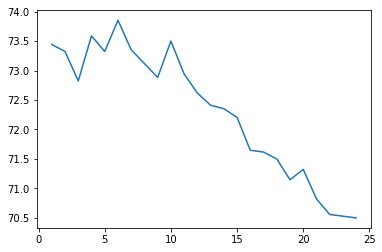

In [18]:
k=range(1,25)
plt.plot(k,acc)
plt.show()